In [33]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import matplotlib.pyplot as plt
import numpy as np

In [41]:
image = "bird.jpg" # Load the image from the specified file path ("bird.jpg")
image = load_img(image) 
image = img_to_array(image) # Convert the loaded image to a NumPy array (needed for TensorFlow processing)# Expand the dimensions of the image to match the batch format expected by TensorFlow

# Expand the dimensions of the image to match the batch format expected by TensorFlow
image = tf.expand_dims(image, axis = 0)  # (i.e., converting from shape (height, width, channels) to (1, height, width, channels))

In [42]:
data_aug = ImageDataGenerator(
    rotation_range = 40, # Randomly rotate images by up to 40 degrees
    zoom_range = 0.5, # Randomly zoom in or out by up to 50%
    shear_range = 0.5, # Apply shear transformations up to 50%
    horizontal_flip = True,  # Randomly flip images horizontally
    brightness_range = (0.5, 1.5) # Adjust brightness within the range [0.5, 1.5]
)

In [49]:
import os

# Define the directory where augmented images will be saved
save_dir = "preview"

# Create the directory if it does not exist
os.makedirs(save_dir, exist_ok = True)

# Generate and save augmented images
i = 0 # Counter to keep track of generated images
for batch in data_aug.flow(image, batch_size = 1,
                          save_to_dir = save_dir, # Save augmented images to the specified directory
                          save_prefix = "image",  # Prefix for saved images
                          save_format = "jpeg"): # Save images in JPEG format
    i += 1 # Increment counter
    if i > 5: # Stop after generating 5 images
        break

In [50]:
aug_images = sorted(os.listdir("preview"))

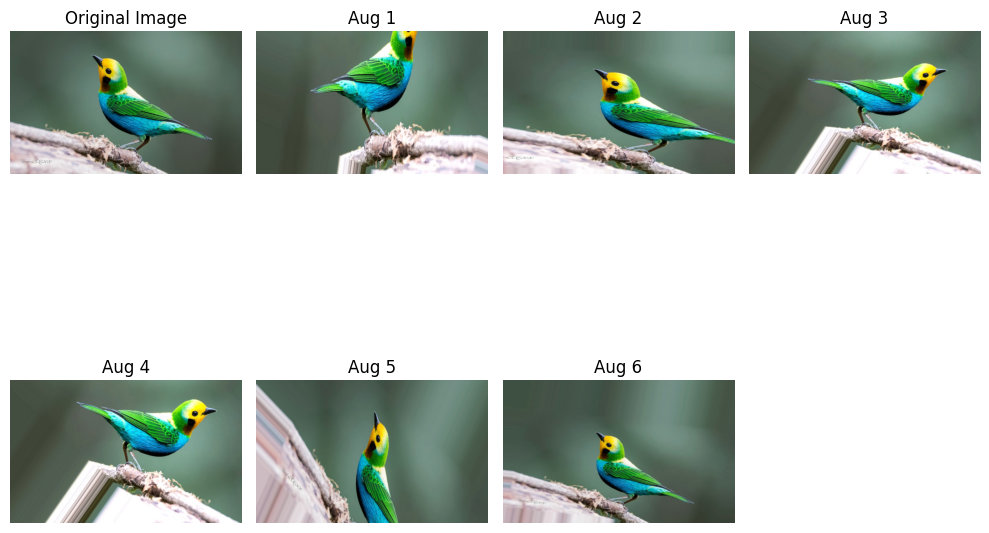

In [51]:
plt.figure(figsize = (10, 8))
plt.subplot(2, 4, 1)
plt.imshow(load_img("bird.jpg"))
plt.title("Original Image")
plt.axis("off")

for i, filename in enumerate(aug_images):
    aug_img_path = os.path.join(save_dir, filename)
    aug_img = load_img(aug_img_path)
    plt.subplot(2, 4, i + 2)
    plt.imshow(aug_img)
    plt.title(f"Aug {i+1}")
    plt.axis("off")
plt.tight_layout()
plt.show()